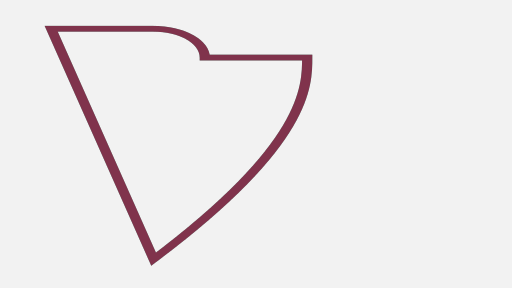

In [13]:
from pdb import set_trace as debugger
import cairo 
import numpy
import math

def draw_gradient(cr):
    pat = cairo.LinearGradient(0.2, 0.35, 0.0, 1.0)
    i = 0.05    
    while i < 0.95:
        x = numpy.random.poisson(lam=i*100, size=4)
        pat.add_color_stop_rgba(x[0], x[1], x[2], x[3], i)
        i = i + 0.025
    cr.rectangle(0, 0, 1, 1) # Rectangle(x0, y0, x1, y1)
    cr.set_source(pat)
    cr.fill()

        
# A simple function to display an image in an ipython notebook 
def nbimage( data ):
    from IPython.display import display, Image 
    from PIL.Image import fromarray
    from StringIO import StringIO
    s = StringIO()
    fromarray( data ).save( s, 'png' ) 
    display( Image( s.getvalue() ) )

WIDTH = 512 
HEIGHT = 288
# this is a numpy buffer to hold the image data
data = numpy.zeros((HEIGHT,WIDTH,4), dtype=numpy.uint8)
# this creates a cairo context based on the numpy buffer
ims = cairo.ImageSurface.create_for_data( data, cairo.FORMAT_ARGB32, WIDTH, HEIGHT ) 
cr = cairo.Context( ims )

# Normalize canvas
cr.scale(WIDTH, HEIGHT)

draw_gradient(cr)

cr.translate(0.1, 0.1) # Changing the current transformation matrix

cr.move_to(0, 0)
cr.arc(0.2, 0.1, 0.1, -math.pi/2, 0) # Arc(cx, cy, radius, start_angle, stop_angle)
cr.line_to(0.5, 0.1) # Line to (x,y)
cr.curve_to(0.5, 0.2, 0.5, 0.4, 0.2, 0.8) # Curve(x1, y1, x2, y2, x3, y3)
cr.close_path()

cr.set_source_rgb(0.3, 0.2, 0.5) # Solid color
cr.set_line_width(0.02)
cr.stroke()

# display the image 
nbimage( data )